# CCIT4092 Data Visualization
# 05 seaborn (3)

In [1]:
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Plotting many distributions

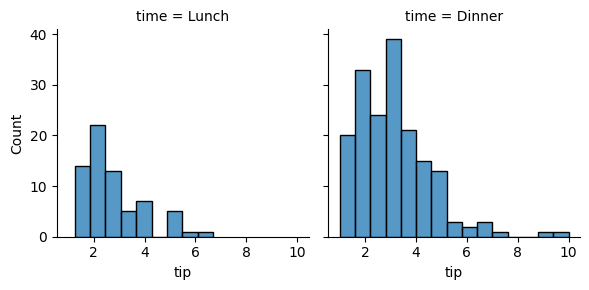

In [2]:
tips = sns.load_dataset("tips", data_home="./data/")

g = sns.FacetGrid(tips, col="time")
g.map(sns.histplot, "tip")
plt.show()
plt.close()

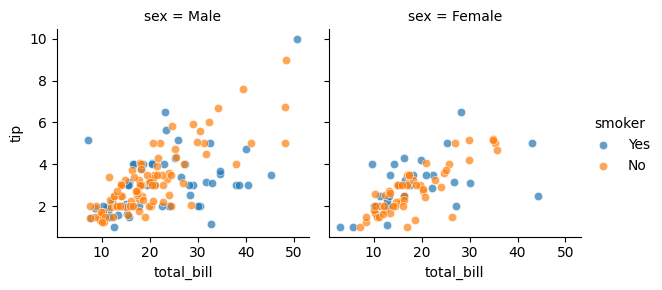

In [3]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(sns.scatterplot, "total_bill", "tip", alpha=.7)
g.add_legend()
plt.show()
plt.close()

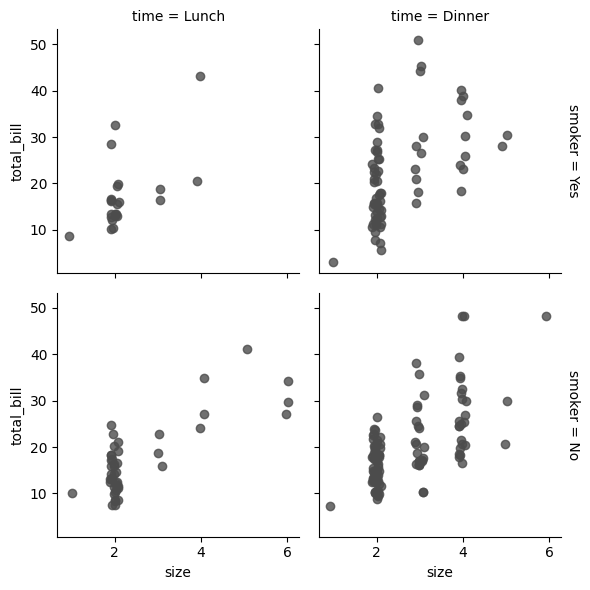

In [4]:
g = sns.FacetGrid(tips, row="smoker", col="time", margin_titles=True)
g.map(sns.regplot, "size", "total_bill", color=".3", fit_reg=False, x_jitter=.1)
plt.show()
plt.close()

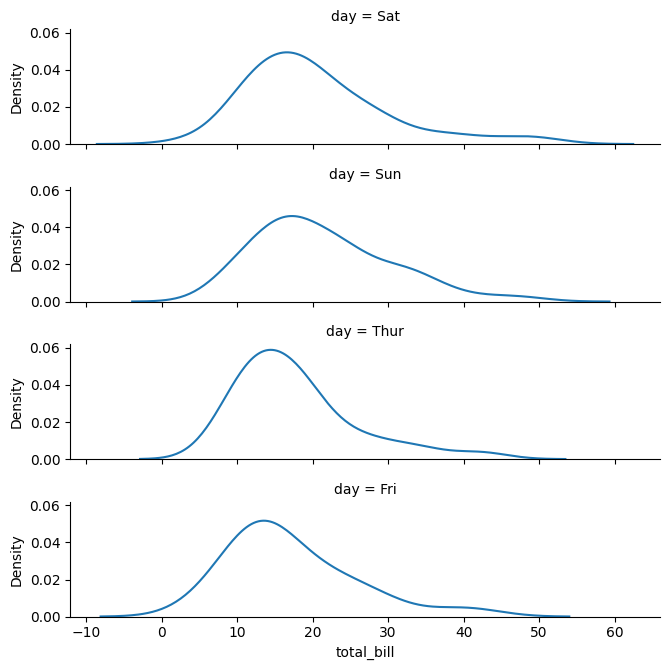

In [5]:
ordered_days = tips.day.value_counts().index
g = sns.FacetGrid(tips, row="day", row_order=ordered_days,
                  height=1.7, aspect=4,)
g.map(sns.kdeplot, "total_bill")
plt.show()
plt.close()

In [6]:
penguins = sns.load_dataset("penguins", data_home='./data/')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


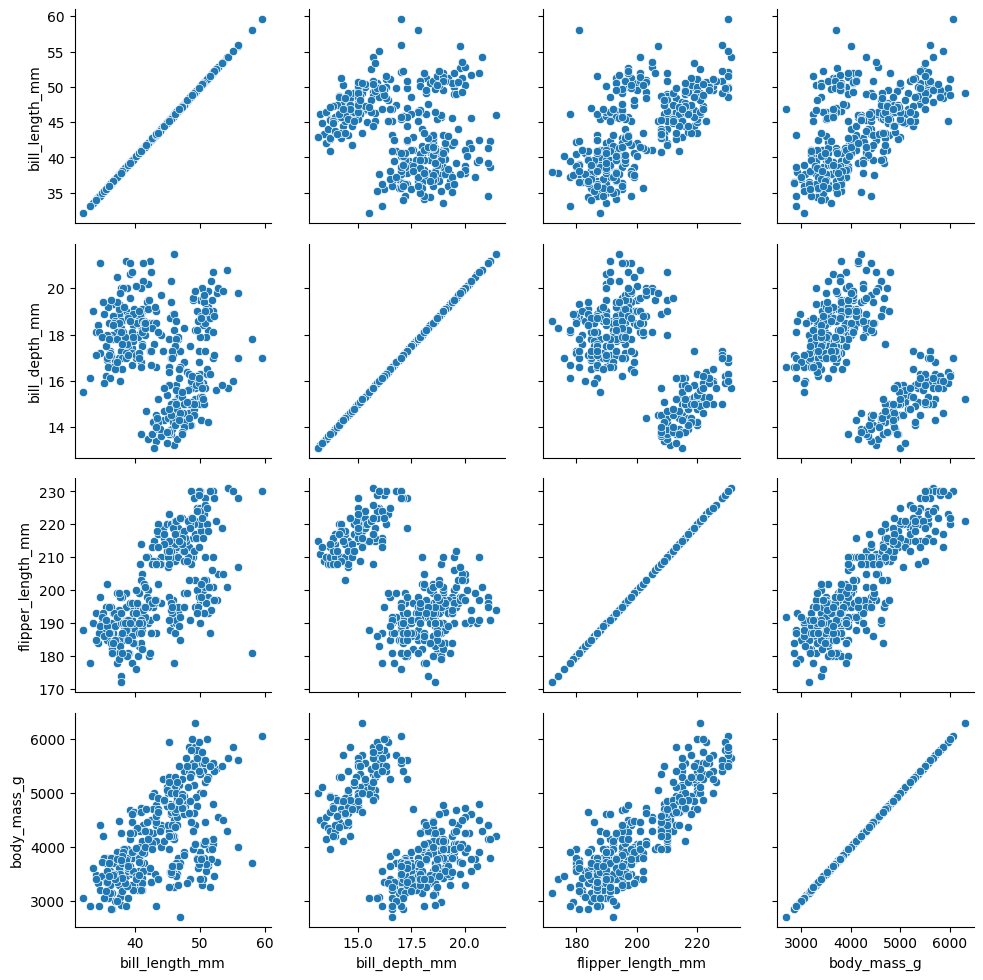

In [7]:
g = sns.PairGrid(penguins)
g.map(sns.scatterplot)
plt.show()
plt.close()

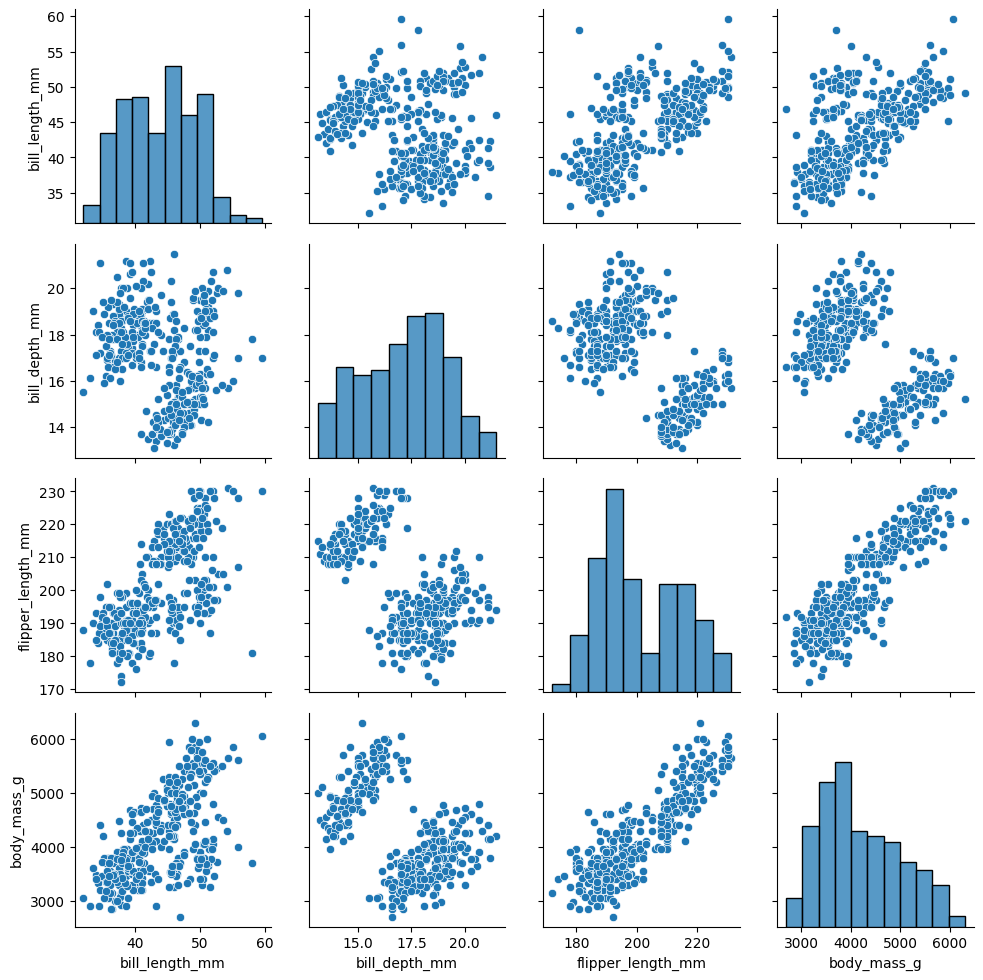

In [8]:
g = sns.PairGrid(penguins)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
plt.show()
plt.close()

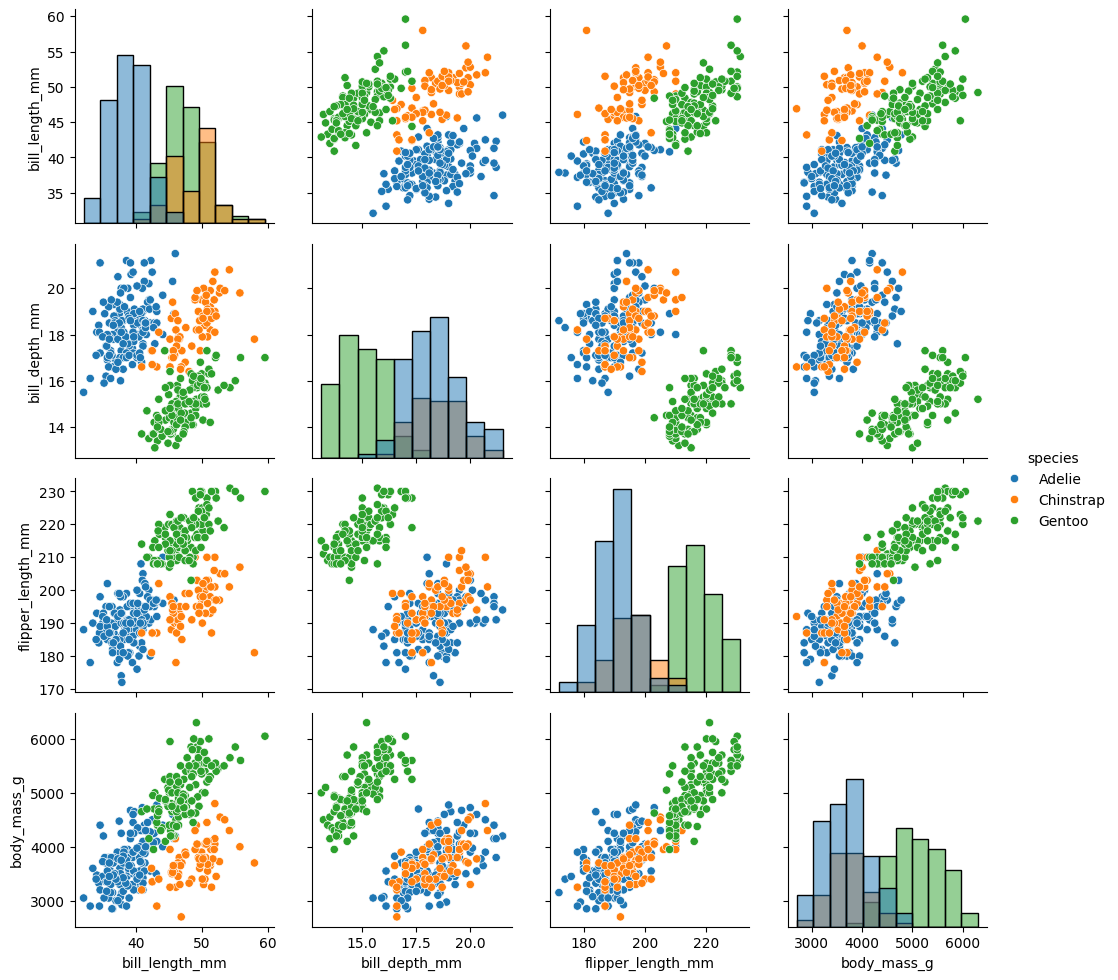

In [9]:
g = sns.PairGrid(penguins, hue="species")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()
plt.close()

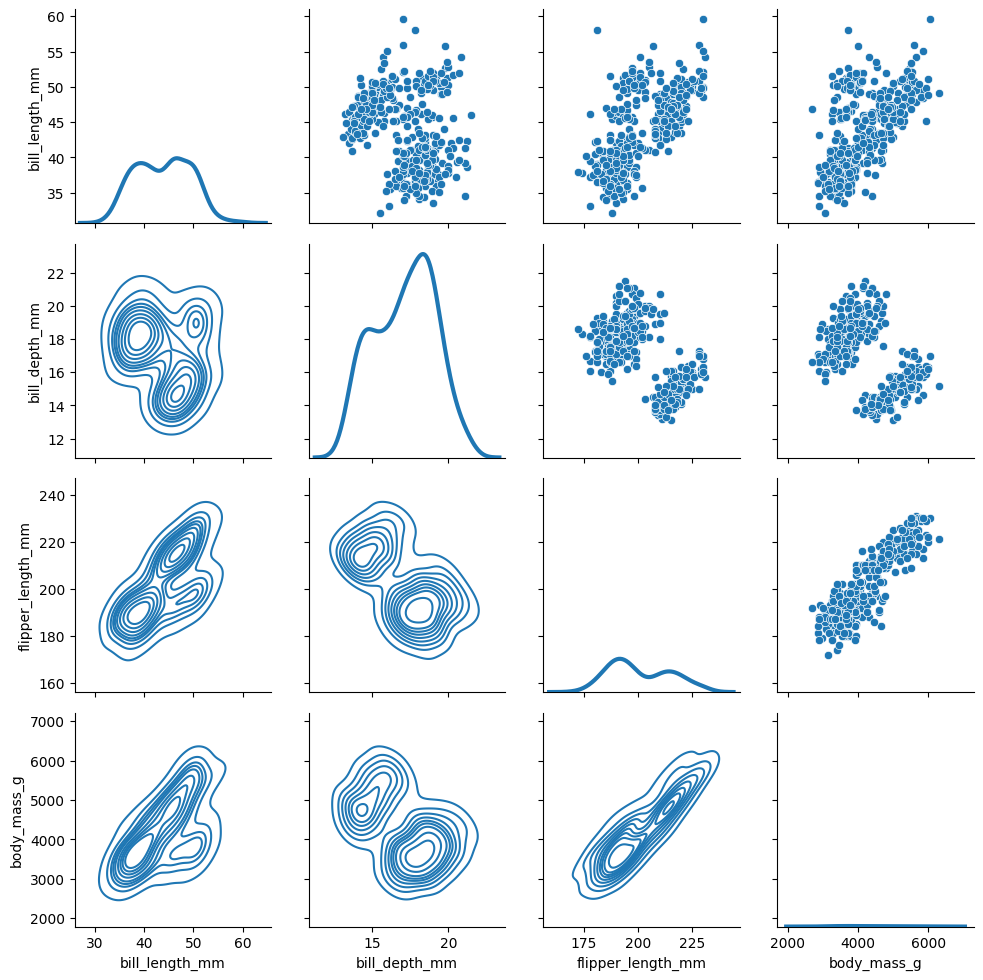

In [10]:
g = sns.PairGrid(penguins)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)
plt.show()
plt.close()

## Plotting catagorical data

In [11]:
tips = sns.load_dataset("tips", data_home='./data/')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


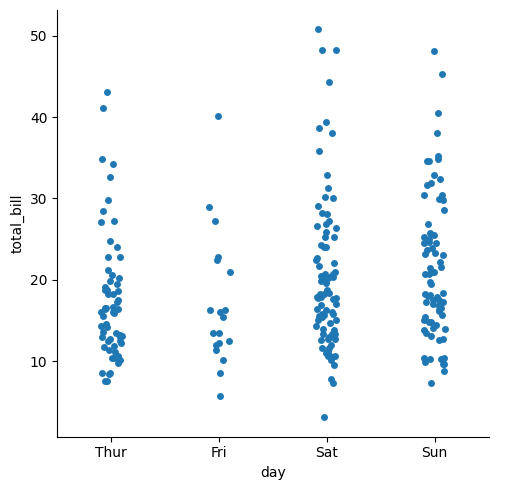

In [12]:
sns.catplot(x="day", y="total_bill", data=tips)
plt.show()
plt.close()

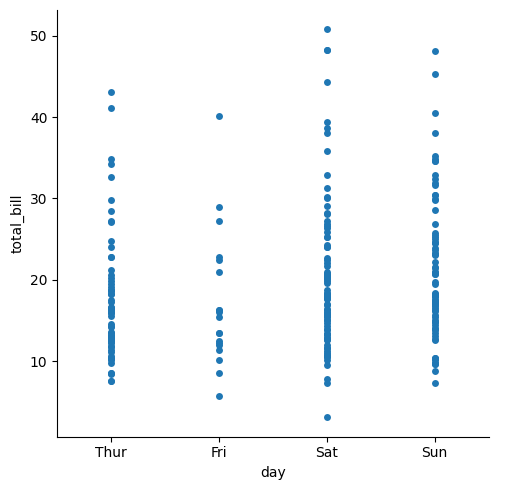

In [13]:
# jitter
sns.catplot(x="day", y="total_bill", jitter=False, data=tips)
plt.show()
plt.close()

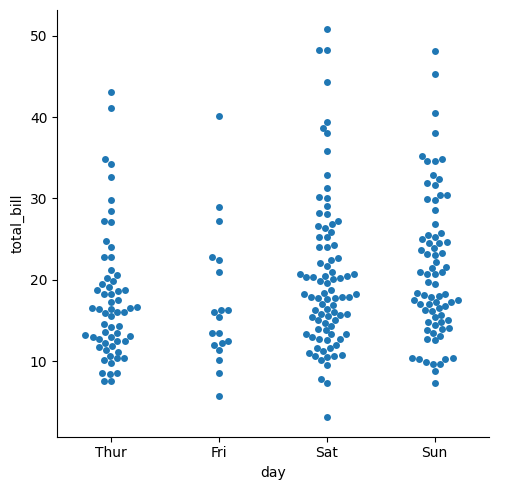

In [14]:
# swarm
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips)
plt.show()
plt.close()

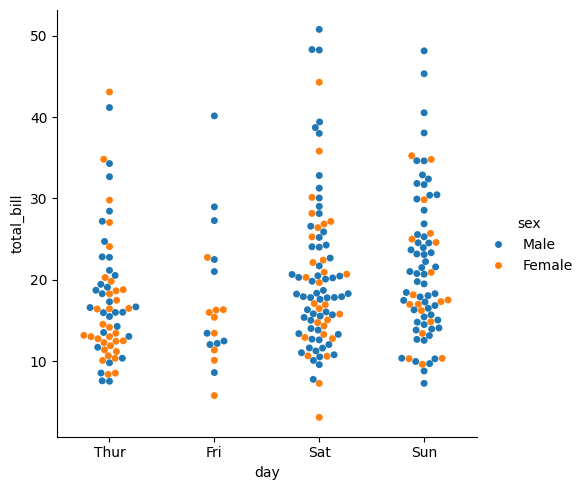

In [15]:
# adding one more dimension
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips)
plt.show()
plt.close()

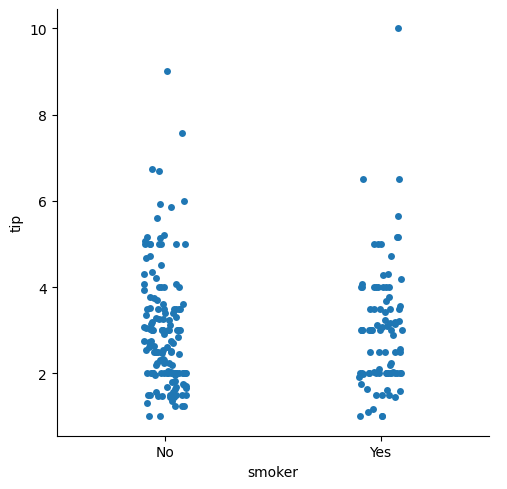

In [16]:
# setting default ordering
sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips)
plt.show()
plt.close()

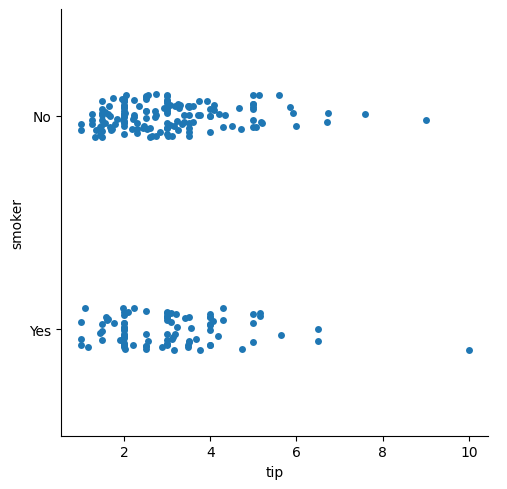

In [17]:
# reverse the axis
sns.catplot(x="tip", y="smoker", order=["No", "Yes"], data=tips)
plt.show()
plt.close()

### Distributions of observations within categories

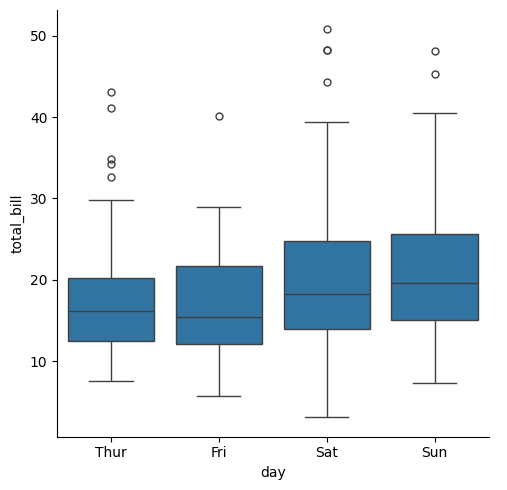

In [18]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips)
plt.show()
plt.close()

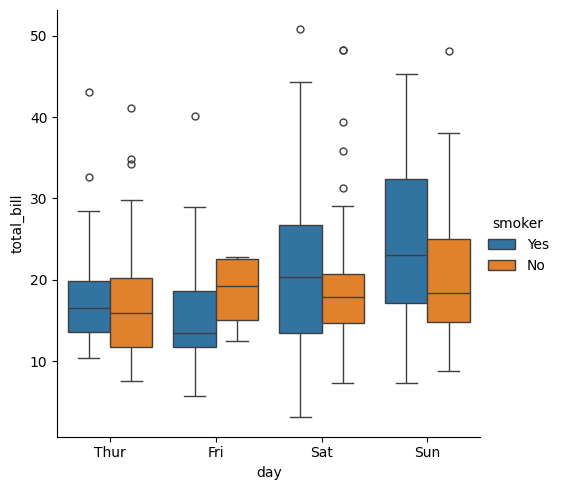

In [19]:
# Adding one more variable using 'hue'
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips)
plt.show()
plt.close()

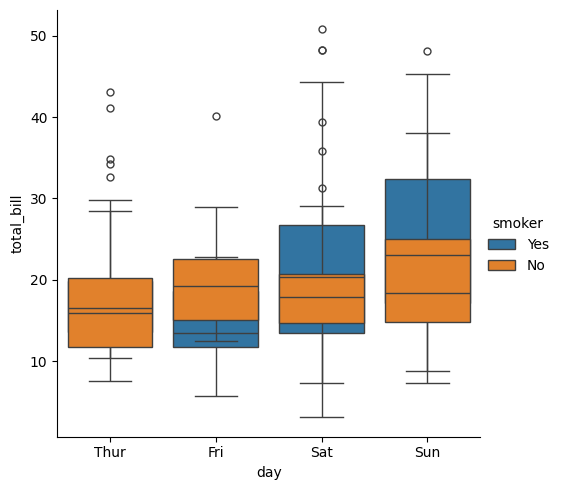

In [20]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips, dodge=False)
plt.show()
plt.close()

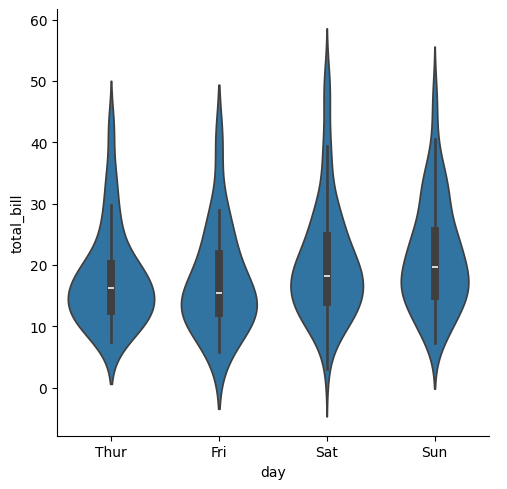

In [21]:
# kind='violin'
sns.catplot(x="day", y="total_bill", kind="violin", data=tips)
plt.show()
plt.close()

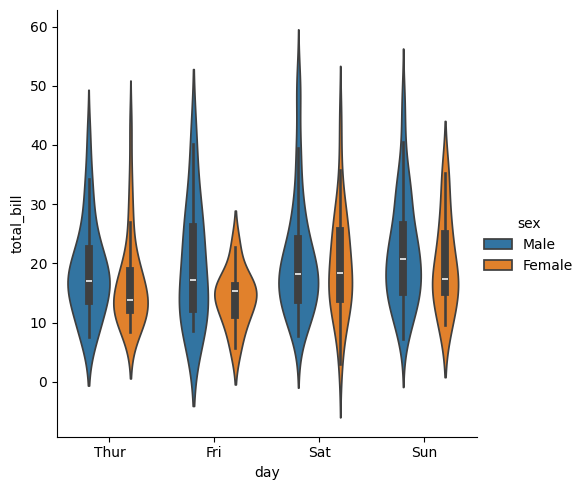

In [22]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="violin", data=tips)
plt.show()
plt.close()

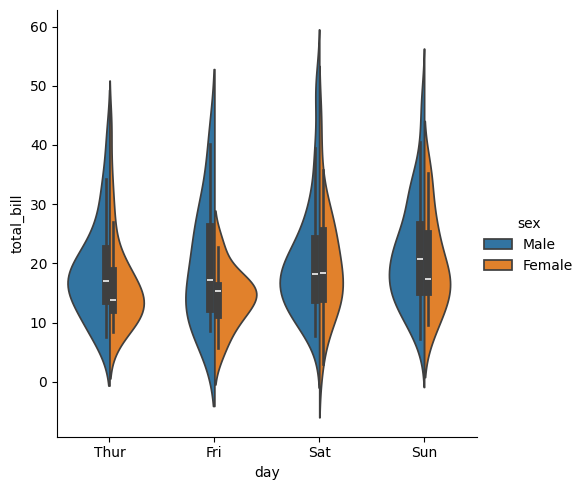

In [23]:
# splitting the violin
sns.catplot(x="day", y="total_bill", hue="sex", kind="violin", split=True, data=tips)
plt.show()
plt.close()

## HeatMap

In [39]:
flights = sns.load_dataset('flights', data_home='./data/')
flights = flights.pivot(index="month", columns="year", values="passengers")
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


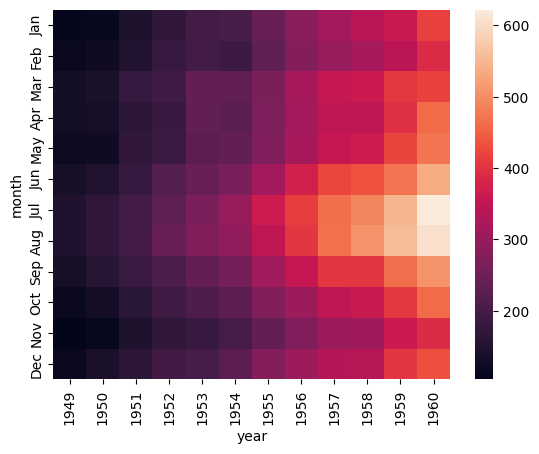

In [25]:
hm = sns.heatmap(flights)
plt.show()
plt.close()

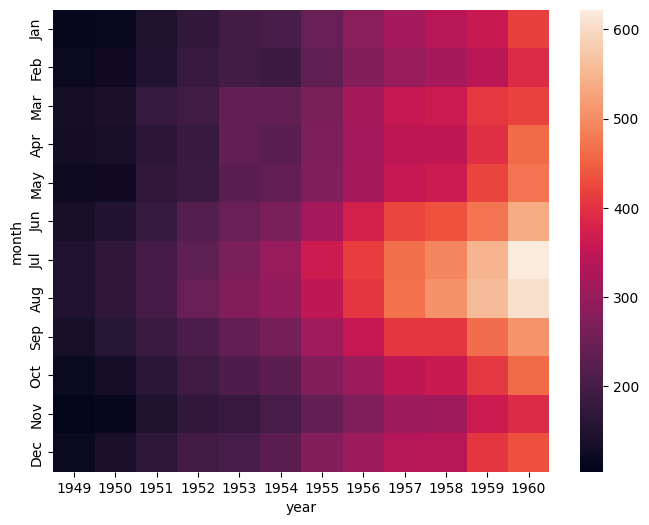

In [26]:
# Controlling the figure size
figure = plt.figure(figsize=(8,6))
ax = plt.subplot(1,1,1)
hm = sns.heatmap(ax=ax, data=flights)
plt.show()
plt.close()

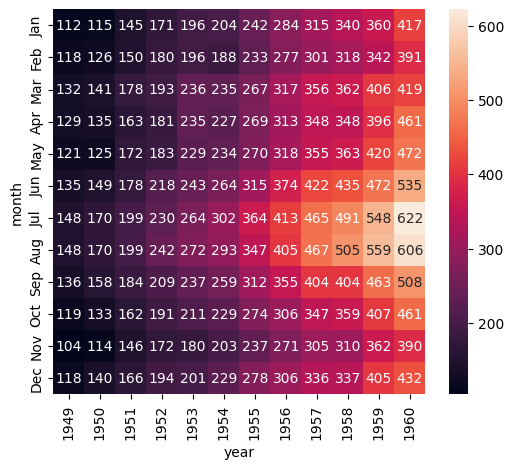

In [27]:
# With annotation
figure = plt.figure(figsize=(6,5))
ax = plt.subplot(1,1,1)
hm = sns.heatmap(data=flights, ax=ax, annot=True, fmt="d")
plt.show()
plt.close()

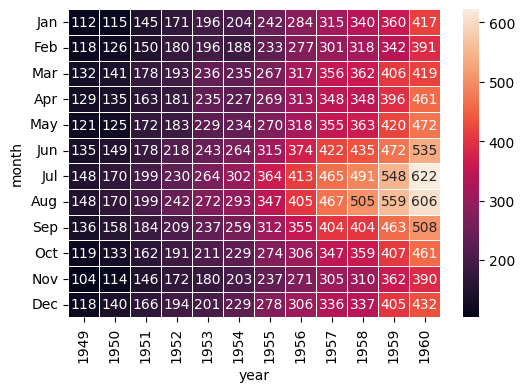

In [28]:
# Add lines between each cell
figure = plt.figure(figsize=(6,4))
ax = plt.subplot(1,1,1)
hm = sns.heatmap(data=flights, annot=True, fmt="d", linewidth=0.5)
plt.show()
plt.close()

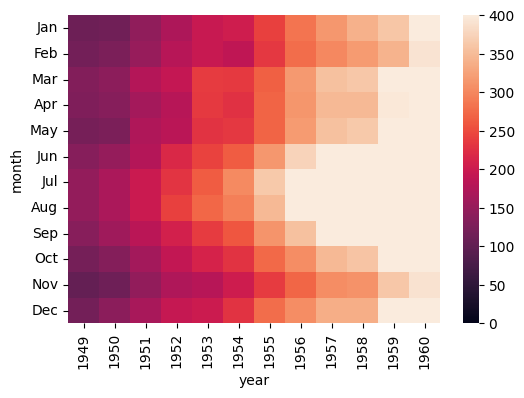

In [29]:
# Adjusting the color range
figure = plt.figure(figsize=(6,4))
ax = plt.subplot(1,1,1)
hm = sns.heatmap(data=flights, vmin=0, vmax=400)
plt.show()
plt.close()

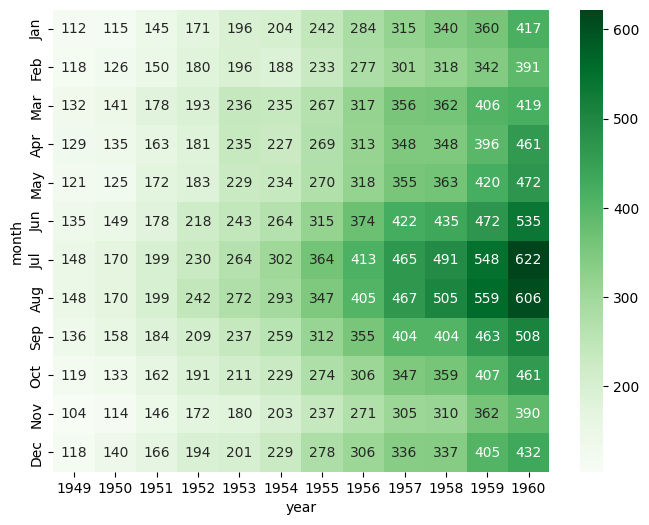

In [30]:
# Changing the color map
# https://matplotlib.org/stable/gallery/color/colormap_reference.html
figure = plt.figure(figsize=(8,6))
ax = plt.subplot(1,1,1)
hm = sns.heatmap(data=flights, annot=True, fmt="d", cmap='Greens')
plt.show()
plt.close()

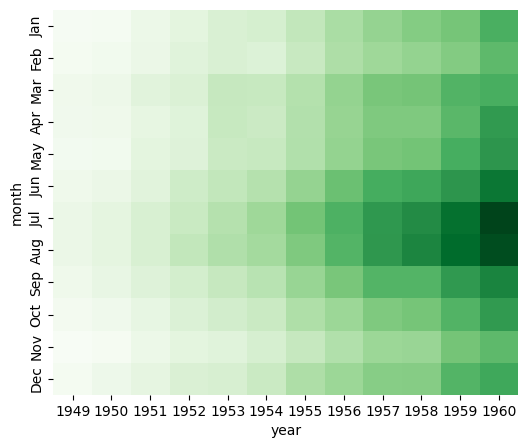

In [31]:
# Don’t draw a colorbar
figure = plt.figure(figsize=(6,5))
ax = plt.subplot(1,1,1)
hm = sns.heatmap(data=flights, cmap='Greens', cbar=False)
plt.show()
plt.close()

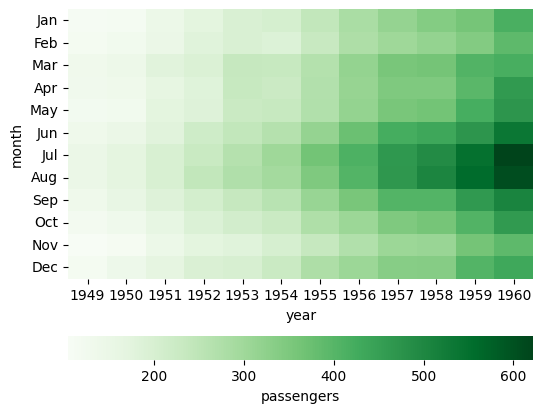

In [32]:
# Color bar arguments
figure = plt.figure(figsize=(6,5))
ax = plt.subplot(1,1,1)
hm = sns.heatmap(data=flights, cmap='Greens', cbar_kws={'label':'passengers', 'orientation': 'horizontal'})
plt.show()
plt.close()

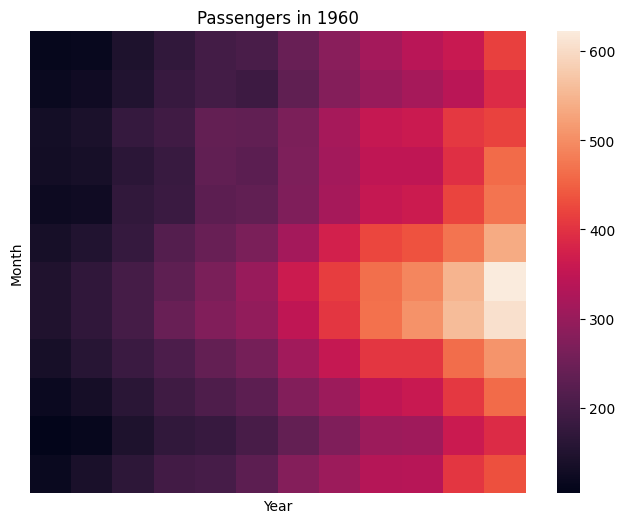

In [33]:
# Customize the labels
figure = plt.figure(figsize=(8,6))
ax = plt.subplot(1,1,1)
hm = sns.heatmap(data=flights, xticklabels=False, yticklabels=False)
plt.title('Passengers in 1960')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()
plt.close()

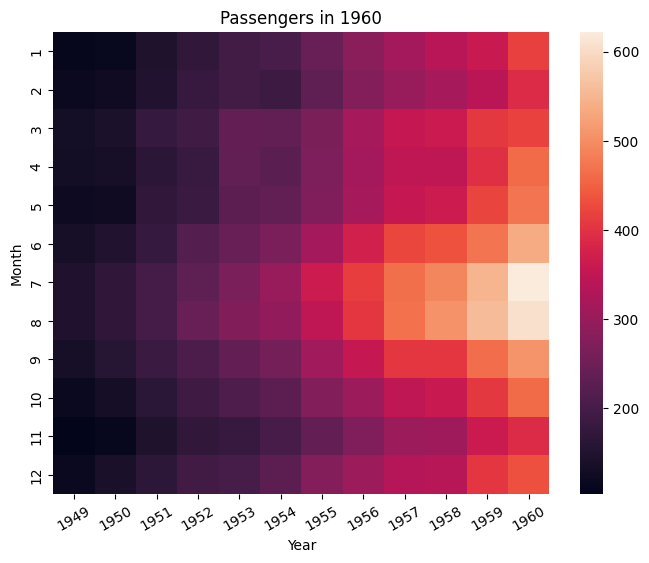

In [34]:
# Customize the labels
figure = plt.figure(figsize=(8,6))
ax = plt.subplot(1,1,1)
hm = sns.heatmap(data=flights)
hm.set_xticklabels(hm.get_xticklabels(), rotation=30)
hm.set_yticklabels(labels=range(1,13), rotation=90)
hm.set_xlabel('Year')
hm.set_ylabel('Month')
plt.title('Passengers in 1960')
plt.show()
plt.close()

### Plotting with date data

In [35]:
import pandas as pd
import numpy as np
df = pd.DataFrame(dict(time=pd.date_range("2020-1-1", periods=365),
                       value=np.random.randn(365).cumsum()))
df

,time,value
0,2020-01-01,-0.858016
1,2020-01-02,-0.541693
2,2020-01-03,0.820621
3,2020-01-04,2.173538
4,2020-01-05,1.105565
...,...,...
360,2020-12-26,-10.638877
361,2020-12-27,-10.364041
362,2020-12-28,-11.538912
363,2020-12-29,-11.001867


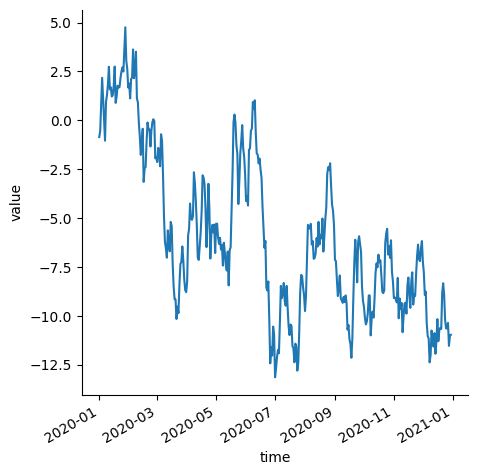

In [36]:
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

In [37]:
dates = pd.date_range(start="2025-1-1", end='2025-1-31', freq='D')
dates

DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
               '2025-01-05', '2025-01-06', '2025-01-07', '2025-01-08',
               '2025-01-09', '2025-01-10', '2025-01-11', '2025-01-12',
               '2025-01-13', '2025-01-14', '2025-01-15', '2025-01-16',
               '2025-01-17', '2025-01-18', '2025-01-19', '2025-01-20',
               '2025-01-21', '2025-01-22', '2025-01-23', '2025-01-24',
               '2025-01-25', '2025-01-26', '2025-01-27', '2025-01-28',
               '2025-01-29', '2025-01-30', '2025-01-31'],
              dtype='datetime64[ns]', freq='D')

In [38]:
dates = pd.date_range(start="2025-1-1", end='2025-3-31', freq='ME')
dates

ValueError: Invalid frequency: ME

In [ ]:
dates = pd.date_range(start="2020-1-1", end='2025-3-31', freq='YE-MAR')
dates

DatetimeIndex(['2020-03-31', '2021-03-31', '2022-03-31', '2023-03-31',
               '2024-03-31', '2025-03-31'],
              dtype='datetime64[ns]', freq='YE-MAR')